# K-means Clustering

## Import resources and display image

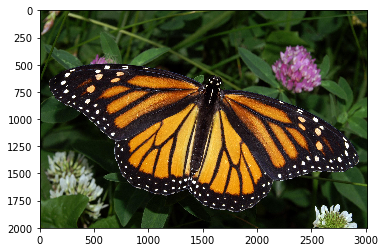

In [7]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

## Prepare data for k-means

In [8]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3)) # <-- k-means needs the data in a vector!
print("Shapes:\n  Image: {}\n  pixel_vals: {}".format(image.shape, pixel_vals.shape))

# pixel_vals[i] is a pixel, i.e, [r g b]
# pixel_vals[i][j] is a color component, i.e, r or g or b

print("Type of elements in pixel_vals (before): {}".format(type(pixel_vals[0][0])))

# Convert to float type
pixel_vals = np.float32(pixel_vals) # <-- k-means needs the data in float format

print("Type of elements in pixel_vals (after): {}".format(type(pixel_vals[0][0])))

Shapes:
  Image: (2000, 3008, 3)
  pixel_vals: (6016000, 3)
Type of elements in pixel_vals (before): <class 'numpy.uint8'>
Type of elements in pixel_vals (after): <class 'numpy.float32'>


## Implement k-means clustering

### cv2.kmeans() function in OpenCV for data clustering

#### Argument 1: samples

It should be of np.float32 data type, and each feature should be put in a single column.

#### Argument 2: nclusters(K)

Number of clusters required at end

#### Argument 3: None

#### Argument 4: criteria

It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are ( `type`, `max_iter`, `epsilon` )

3.a - Type of termination criteria.

It has 3 flags as below:
`cv2.TERM_CRITERIA_EPS` - stop the algorithm iteration if specified accuracy, epsilon, is reached. `cv2.TERM_CRITERIA_MAX_ITER` - stop the algorithm after the specified number of iterations, max_iter. `cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER` - stop the iteration when any of the above condition is met.

3.b - max_iter - An integer specifying maximum number of iterations.

3.c - epsilon - Required accuracy

#### Argument 5: attempts

Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

#### Argument 6 :flags

This flag is used to specify how initial centers are taken. Normally two flags are used for this : `cv2.KMEANS_PP_CENTERS` and `cv2.KMEANS_RANDOM_CENTERS`.


retval's type: <class 'float'>
label's type: <class 'numpy.ndarray'>
center's type: <class 'numpy.ndarray'>
labels' shape: (6016000, 1)
centers' shape: (4, 3)
[[ 61  74  38]
 [ 20  23  12]
 [216 144  37]
 [181 167 163]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

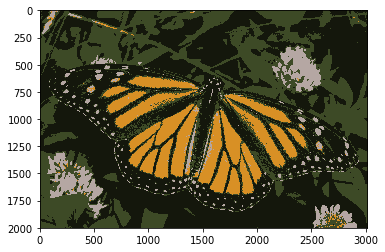

In [9]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 4
retval, labels, rgb_centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

print("retval's type:", type(retval))
print("label's type:", type(labels))
print("center's type:", type(rgb_centers))

print("labels' shape: {}".format(labels.shape))
print("centers' shape: {}".format(rgb_centers.shape))

# convert data into 8-bit values
rgb_centers = np.uint8(rgb_centers) # rgb coordinates => [[r0,g0,b0], [r1,g1,b1], [r2,g2,b2], [r3,g3,b3]], 'cause k=4
segmented_data = rgb_centers[labels.flatten()] # labels.flatten() puts a MxN matrix in a 1x(MxN) format
                                           # i.e, all the rows in a row.
                                           # For labels --> from Nx1 to 1x<(Nx1) = 1xN (row to column)
print(rgb_centers)
print(labels.flatten()[1:100])
print(labels.flatten()[12345:13100])

# rgb_centers => [[r0,g0,b0], [r1,g1,b1], [r2,g2,b2], ... , [r_{k-1}, g_{k-1}, b_{k-1}]] => k rgb centers => k x 3 matrix
# labels.flatten() => [0, 2, i, j, ..., 0, k-1, ..., 1, 4] (example of labels.flatten())
#                 => 1x(MxN) labels. original image is MxN
#                 => pixel in original img at (0,0) is associated at label 0
#                    pixel in original img at (0,1) is associated at label 2
#                    pixel in original img at (0,2) is associated at label i
#                    pixel in original img at (0,3) is associated at label j
#                    pixel in original img at (m,n) is associated at label 0
#                    pixel in original img at (m,n+1) is associated at label k-1
#                    pixel in original img at (M-1,N-2) is associated at label 1
#                    pixel in original img at (M-1,N-1) is associated at label 4                    
#centers[labels.flatten()] 
#                 => [0, 2, i, j, ..., 0, k-1, ..., 1, 4] (example of labels.flatten())
#                 => pixel in original img at (0,0) is associated at label 0 => associated to center centers[0], i.e, [r0, g0, b0]
#                    pixel in original img at (0,1) is associated at label 2 => associated to center centers[2], i.e, [r2, g2, b2]
#                    pixel in original img at (0,2) is associated at label i => associated to center centers[i], i.e, [ri, gi, bi]
#                    pixel in original img at (0,3) is associated at label j => associated to center centers[j], i.e, [rj, gj, bj]
#                    pixel in original img at (m,n) is associated at label 0  => associated to center centers[0], i.e, [r0, g0, b0]
#                    pixel in original img at (m,n+1) is associated at label k-1 => associated to center centers[k-1], i.e, [r_{k-1}, g_{k-1}, b_{k-1}]
#                    pixel in original img at (M-1,N-2) is associated at label 1 => associated to center centers[1], i.e, [r1, g1, b1]
#                    pixel in original img at (M-1,N-1) is associated at label 4 => associated to center centers[4], i.e, [r4, g4, b4]                      
#         
# centers[labels.flatten()] = centers[[0, 2, i, j, ..., 0, k-1, ..., 1, 4]] =
#                           = [[r0,g0,b0], [r2,g2,b2],[ri,gi,bi], [rj,gj,bj],...,[r0,g0,b0],[r_{k-1},g_{b-1},b_{k-1}]
#                              ,...,[r1,g1,b1],[r4,g4,b4]]
# reshape data into the original image dimensions => form an image only with k different colors
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(segmented_image)

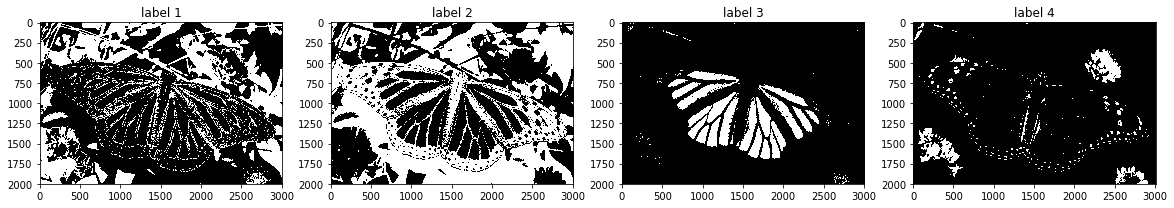

In [10]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
f,(p1,p2,p3,p4) = plt.subplots(1,4,figsize=(20,30))
p1.set_title('label 0')
p1.imshow(labels_reshape==0, cmap='gray')

p2.set_title('label 1')
p2.imshow(labels_reshape==1, cmap='gray')

p3.set_title('label 2')
p3.imshow(labels_reshape==2, cmap='gray')

p4.set_title('label 3')
p4.imshow(labels_reshape==3, cmap='gray')

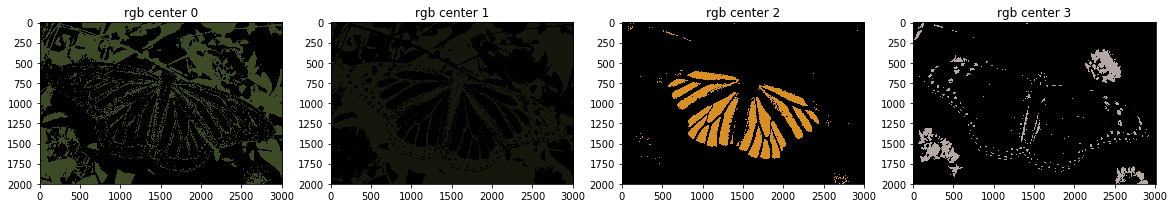

In [13]:
# mask an image segment by cluster
#cluster = 0 # the first cluster

masked_image_0 = np.copy(image)
masked_image_1 = np.copy(image)
masked_image_2 = np.copy(image)
masked_image_3 = np.copy(image)

f,(p0,p1,p2,p3) = plt.subplots(1,4,figsize=(20,30))
# turn the mask green!
masked_image_0[labels_reshape == 0] = rgb_centers[0]
masked_image_0[labels_reshape != 0] = [0,   0, 0]
p0.set_title('rgb center 0')
p0.imshow(masked_image_0)

masked_image_1[labels_reshape == 1] = rgb_centers[1]
masked_image_1[labels_reshape != 1] = [0,   0, 0]
p1.set_title('rgb center 1')
p1.imshow(masked_image_1)

masked_image_2[labels_reshape == 2] = rgb_centers[2]
masked_image_2[labels_reshape != 2] = [0,   0, 0]
p2.set_title('rgb center 2')
p2.imshow(masked_image_2)

masked_image_3[labels_reshape == 3] = rgb_centers[3]
masked_image_3[labels_reshape != 3] = [0,   0, 0]
p3.set_title('rgb center 3')
p3.imshow(masked_image_3)